In [1]:
%matplotlib inline
import sys
sys.path.append("../")
from utils.plot_utils import plot_decision_regions, plot_confusion_matrix, plotSVC

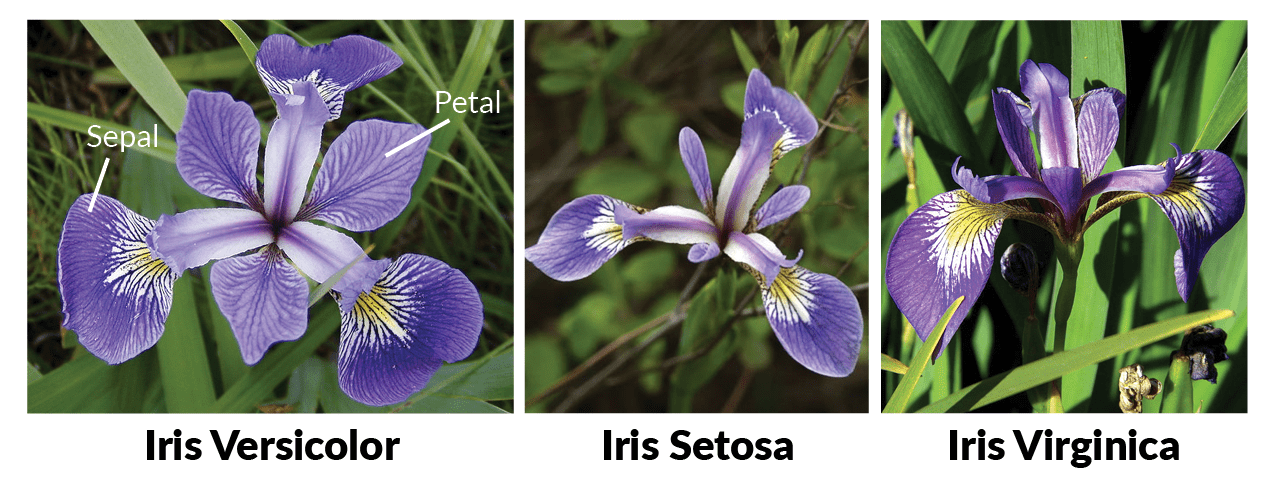

## Exploratory data analysis
- [ref1](https://medium.com/@harimittapalli/exploratory-data-analysis-iris-dataset-9920ea439a3e)
- [ref2](https://www.kaggle.com/lnbalon/iris-dataset-eda-and-classification-analysis)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
iris = pd.read_csv("../datasets/iris.csv") # the iris

In [4]:
iris.head() #first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris = iris.drop('Id', axis=1)

In [6]:
iris.tail() #bottom 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
#checking there are any inconsistencies/null-values in the data
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris.shape

(150, 5)

In [9]:
# Use describe() function to see the statistics of the dataset such as mean, median, mode, standard deviation etc.
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# ¿El dataset está balanceado?
print (iris['Species'].count())
print (iris['Species'].value_counts())

150
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


In [11]:
# ¿Hay nulos?
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

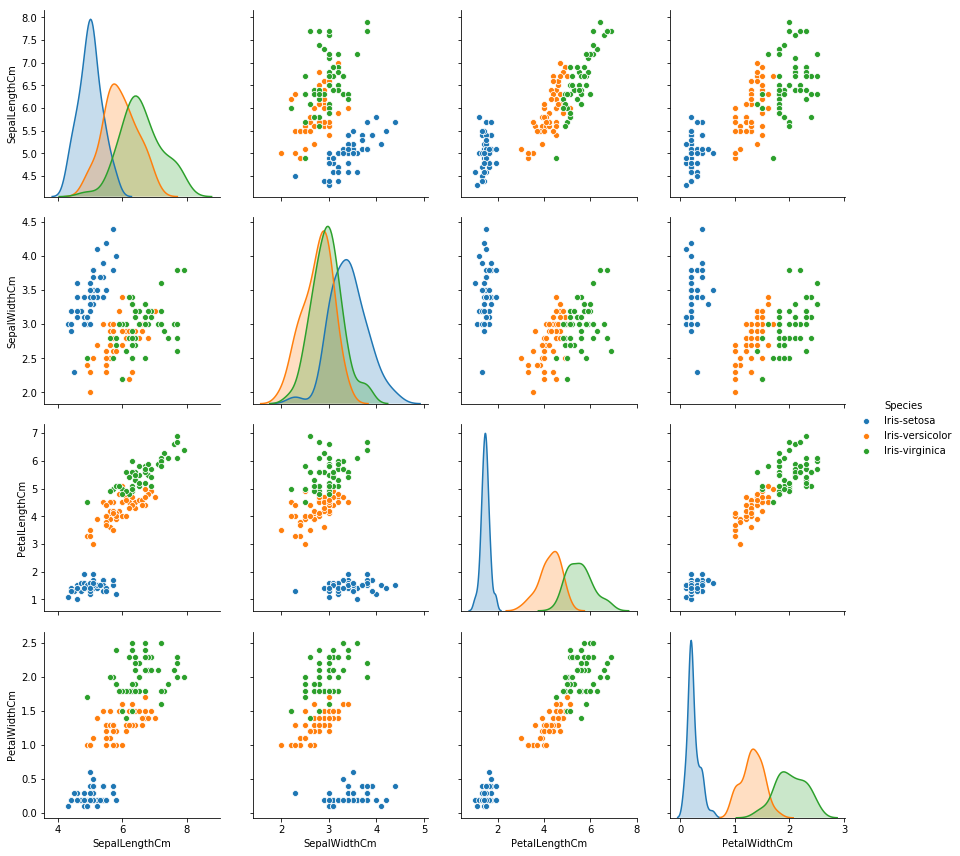

In [12]:
sns.pairplot(iris, hue="Species", height=3)

[]

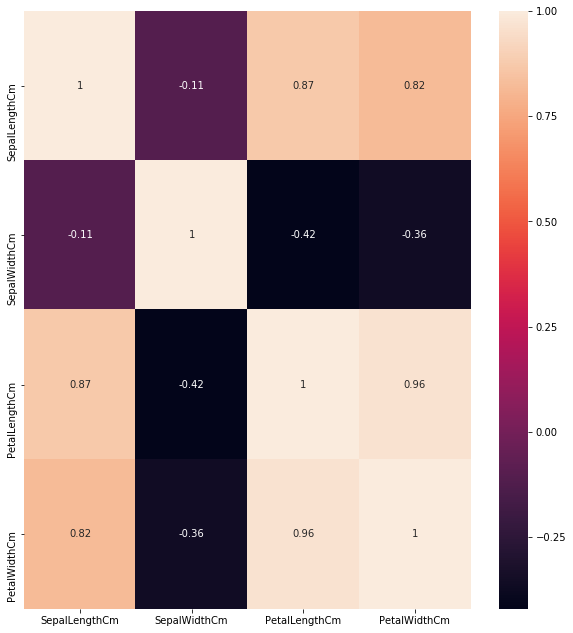

In [13]:
# ¿Hay correlación entre atributos?
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

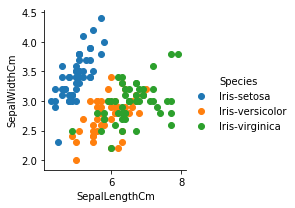

In [14]:
sns.FacetGrid(iris, hue="Species").map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

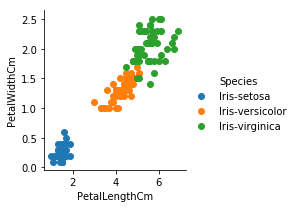

In [15]:
sns.FacetGrid(iris, hue="Species").map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

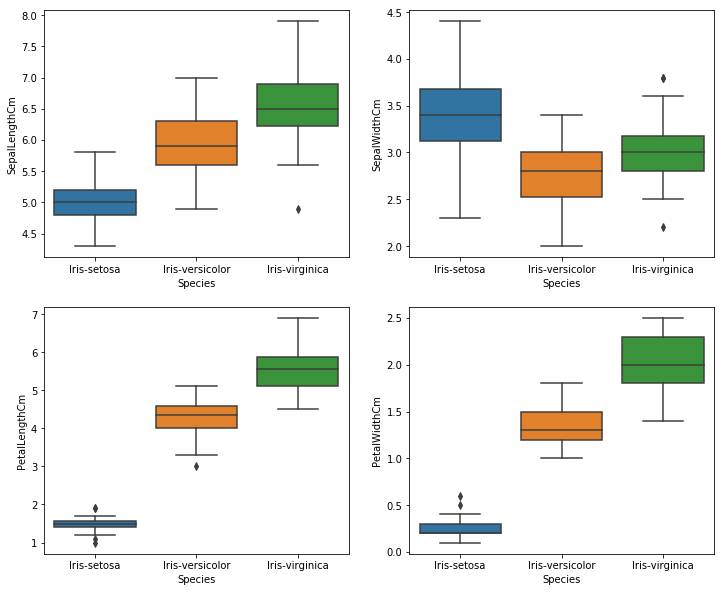

In [16]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y="SepalLengthCm",data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y="SepalWidthCm",data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y="PetalLengthCm",data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y="PetalWidthCm",data=iris)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c64ce6f98>,
      dtype=object)

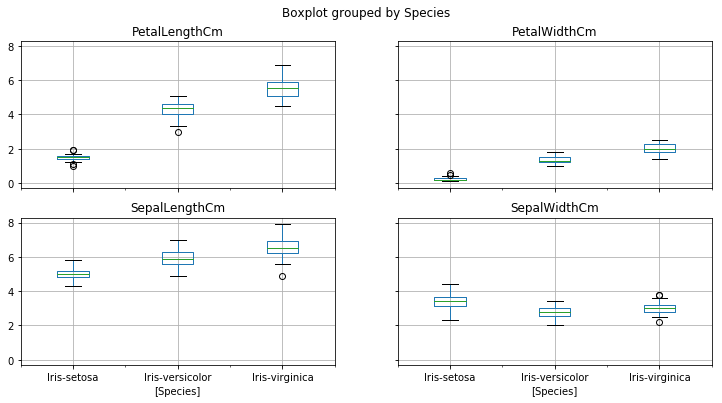

In [17]:
iris.boxplot(by="Species", figsize=(12, 6))

/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


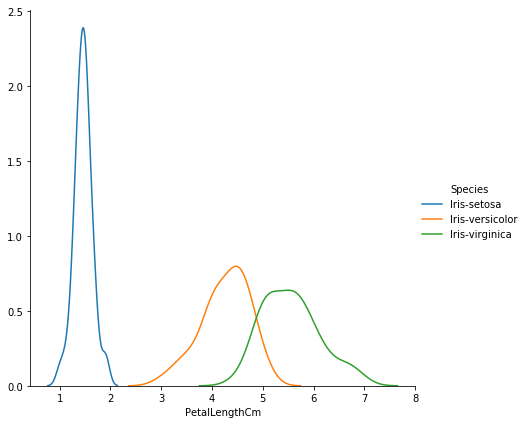

In [18]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [8]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    h = (x_max / x_min)/100
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    
                         np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    
    plt.show()

## Decision tree

Selected features: ['sepal length (cm)', 'sepal width (cm)'] 



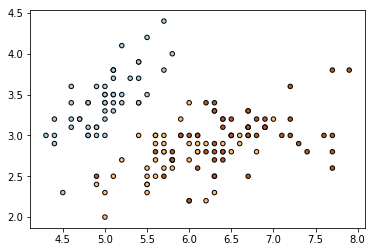

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names
selected_features = iris.feature_names[:2]

print(f'Selected features: {selected_features} \n')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.show()

# import some data to play with
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# predicting on the test set
y_pred=tree.predict(X_test)

## SVM

Selected features: ['sepal length (cm)', 'sepal width (cm)'] 



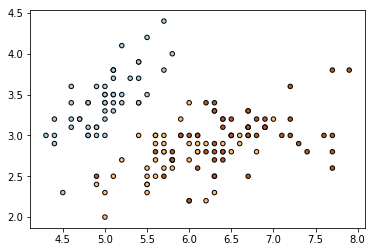

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names
selected_features = iris.feature_names[:2]

print(f'Selected features: {selected_features} \n')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.show()

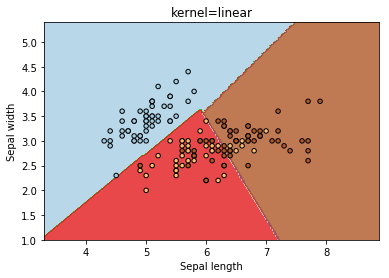

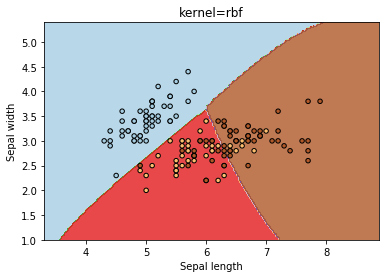

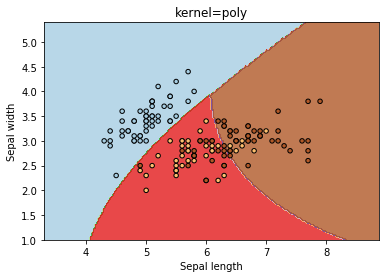

In [7]:
# kernel parameters selects the type of hyperplane used to separate the data. 
# Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). 
# ‘rbf’ and ‘poly’ uses a non linear hyper-plane

kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
  svc = svm.SVC(kernel=kernel, gamma='scale').fit(X, y)
  plotSVC(f'kernel={kernel}')

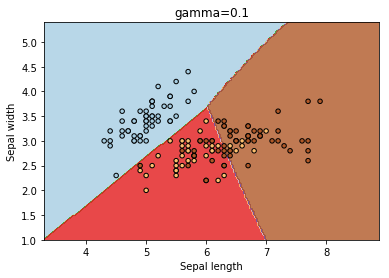

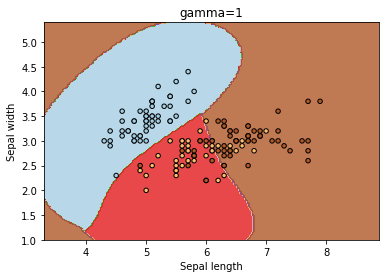

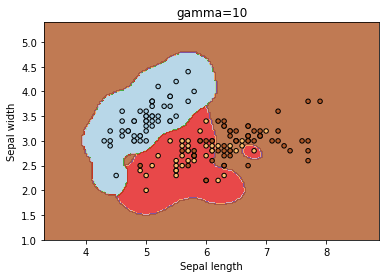

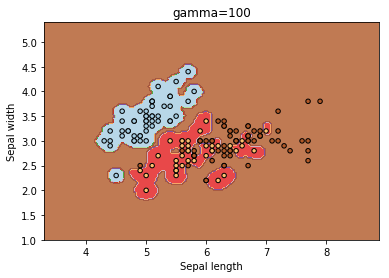

In [23]:
# gamma is a parameter for non linear hyperplanes. 
# The higher the gamma value it tries to exactly fit the training data set

gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC(f'gamma={gamma}')

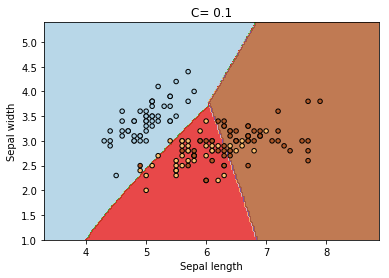

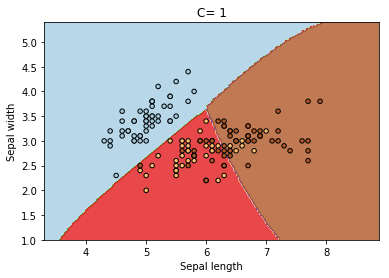

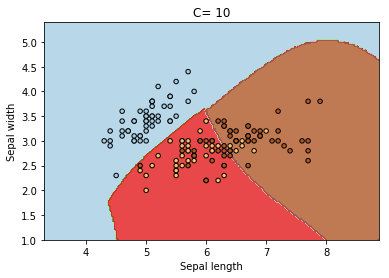

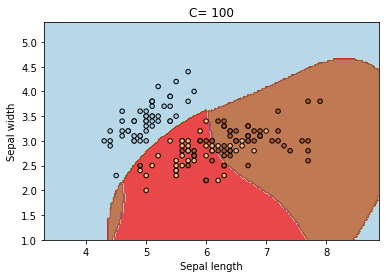

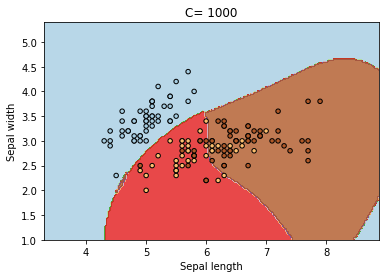

In [24]:
# C is the penalty parameter of the error term. 
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
# Increasing C values may lead to overfitting the training data.
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
   svc = svm.SVC(kernel='rbf', gamma='scale', C=c).fit(X, y)
   plotSVC(f'C= {c}')


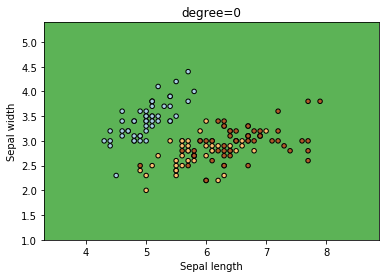

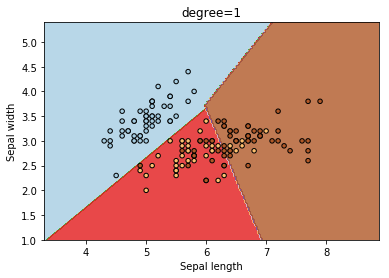

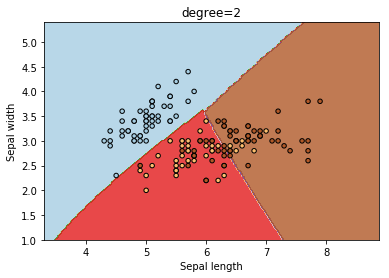

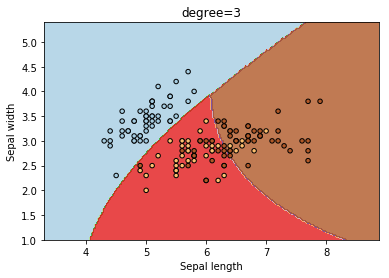

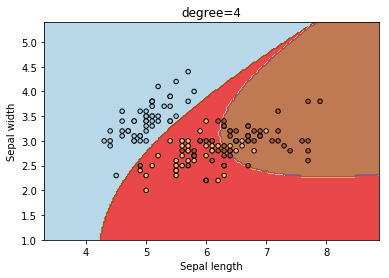

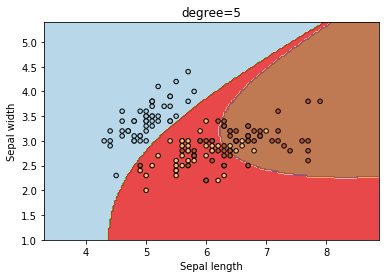

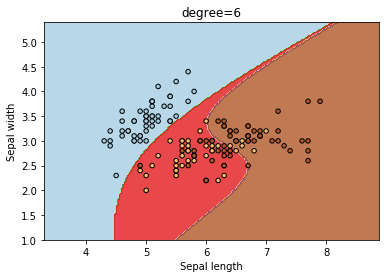

In [25]:
# degree is a parameter used when kernel is set to ‘poly’. 
# It’s basically the degree of the polynomial used to find the hyperplane to split the data.
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
   svc = svm.SVC(kernel='poly', gamma='scale', degree=degree).fit(X, y)
   plotSVC(f'degree={degree}')

## K-Nearest Neighbor

Selected features: ['sepal length (cm)', 'sepal width (cm)'] 



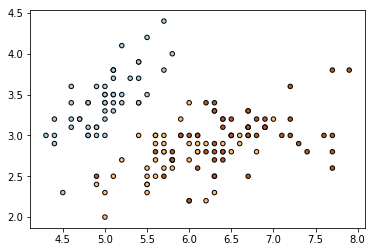

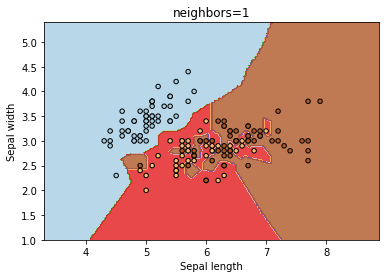

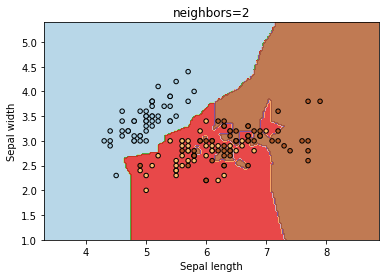

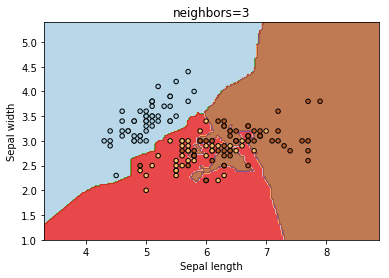

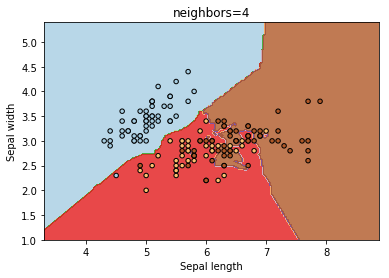

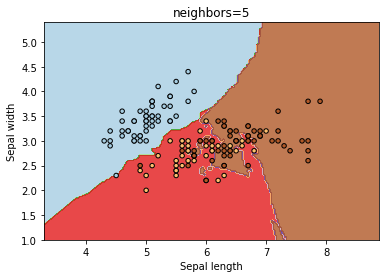

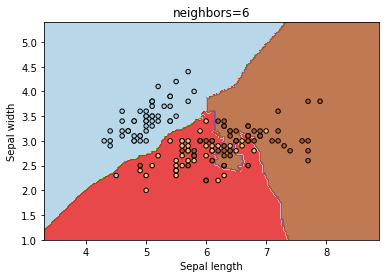

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names
selected_features = iris.feature_names[:2]

print(f'Selected features: {selected_features} \n')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.show()

# kernel parameters selects the type of hyperplane used to separate the data. 
# Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). 
# ‘rbf’ and ‘poly’ uses a non linear hyper-plane

for neighbors in range(1,7):
    svc = KNeighborsClassifier(n_neighbors=neighbors).fit(X, y)
    plotSVC(f'neighbors={neighbors}')

In [34]:
for neighbors in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    print ('neighbors: {}'.format(neighbors), "Training set score: {:.3f}".format(knn.score(X_train,y_train)),
           'Test set score: {:.3f}'.format(knn.score(X_test,y_test)) )

neighbors: 1 Training set score: 1.000 Test set score: 0.956
neighbors: 2 Training set score: 0.990 Test set score: 0.956
neighbors: 3 Training set score: 1.000 Test set score: 0.956
neighbors: 4 Training set score: 0.981 Test set score: 0.956
neighbors: 5 Training set score: 0.962 Test set score: 0.956
neighbors: 6 Training set score: 0.971 Test set score: 0.956
